In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000018349"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000018349
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,SYNOVUS FINANCIAL CORP
Ticker,SNV


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,2.0,1.445000e+01,1.178040e+01,6.120000e+00,1.028500e+01,1.445000e+01,1.861500e+01,2.278000e+01
interest income,34.0,2.673564e+08,5.863770e+07,1.290100e+08,2.337035e+08,2.531010e+08,2.874165e+08,5.048390e+08
net income,60.0,3.092308e+07,1.839017e+08,-6.354100e+08,2.960500e+07,5.487800e+07,1.061205e+08,7.274960e+08
net interest income,61.0,2.416113e+08,4.135684e+07,9.263800e+07,2.123450e+08,2.399270e+08,2.677980e+08,3.971750e+08
provision for loan losses,61.0,8.278564e+07,1.328412e+08,2.220000e+06,9.511000e+06,1.963900e+07,9.104900e+07,6.315260e+08
total revenue,1.0,4.762500e+08,NaN,4.762500e+08,4.762500e+08,4.762500e+08,4.762500e+08,4.762500e+08


# Plots

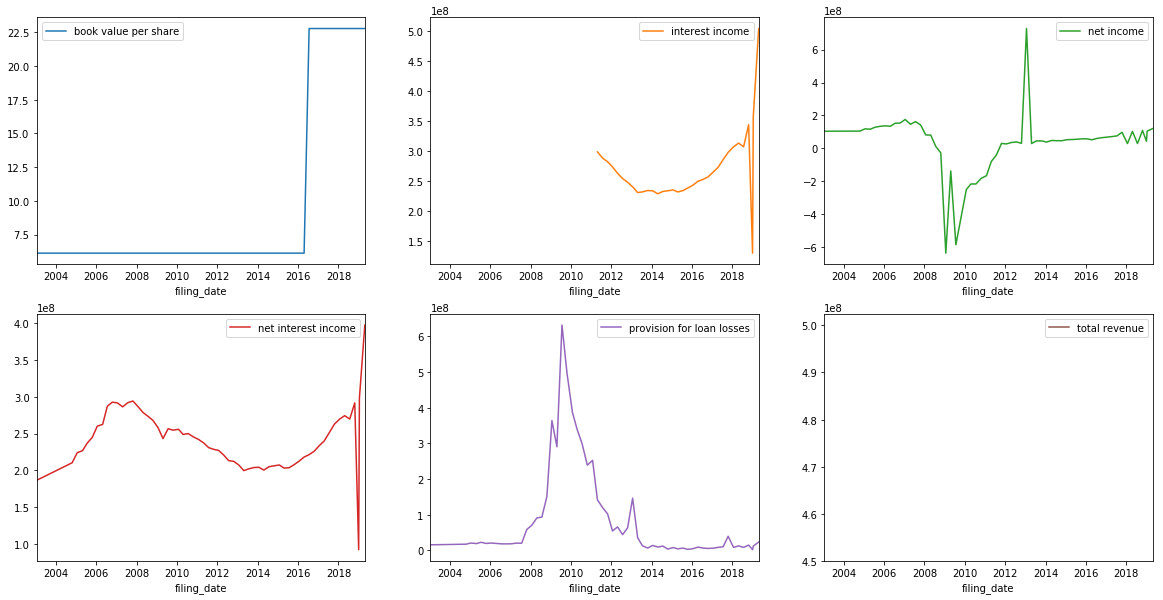

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000018349 book value per share       2002Q3 to 2016Q1: 55 periods    missing   
           book value per share       2016Q3 to 2019Q1: 11 periods    missing   
           interest income            2002Q2 to 2010Q4: 35 periods    missing   
           interest income                                  2018Q2    missing   
           interest income                                  2018Q3  duplicate   
           net income                  2002Q2 to 2002Q3: 2 periods    missing   
           net income                  2003Q1 to 2004Q1: 5 periods    missing   
           net income                                       2004Q3    missing   
           net income                                       2010Q2    missing   
           net income                                       2018Q2    missing   
           net income                  2018Q3 to 2018Q4: 2 periods  duplicate   
           net interest income         2002Q2 to 2002Q3: 2 periods    missing   
           net interest income         2003Q1 to 2004Q1: 5 periods    missing   
           net interest income                              2004Q3    missing   
           net interest income                              2018Q2    missing   
           net interest income                              2018Q3  duplicate   
           provision for loan losses   2002Q2 to 2002Q3: 2 periods    missing   
           provision for loan losses   2003Q1 to 2004Q1: 5 periods    missing   
           provision for loan losses                        2004Q3    missing   
           provision for loan losses                        2018Q2    missing   
           provision for loan losses   2018Q3 to 2018Q4: 2 periods  duplicate   
           total revenue              2002Q2 to 2018Q4: 67 periods    missing   

                                               message  
cik        item                                         
0000018349 book value per share         Missing period  
           book value per share         Missing period  
           interest income              Missing period  
           interest income              Missing period  
           interest income            Duplicate period  
           net income                   Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                 Duplicate period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income        Duplicate period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           provision for loan losses  Duplicate period  
           total revenue                Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()